# Part 2: Horse Race Prediction
## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autotime

import warnings
warnings.filterwarnings("ignore")

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-10-22 00:11:34 +08:00)


In [5]:
# Read the train data
df_train = pd.read_csv("./data/df_train.csv")

# Read the test data
df_test = pd.read_csv("./data/df_test.csv")

# Concatenate the train and test data
df = pd.concat([df_train, df_test], axis=0)
df.head()

# Save df as df_train
df_train = df.copy()

time: 156 ms (started: 2022-10-22 00:11:34 +08:00)


In [6]:
# Check the info of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26425 entries, 0 to 5285
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     26425 non-null  int64  
 1   horse_number           26425 non-null  float64
 2   horse_name             26425 non-null  object 
 3   horse_id               26425 non-null  object 
 4   jockey                 26425 non-null  object 
 5   trainer                26425 non-null  object 
 6   actual_weight          26425 non-null  int64  
 7   declared_horse_weight  26425 non-null  int64  
 8   draw                   26425 non-null  int64  
 9   length_behind_winner   26425 non-null  object 
 10  running_position_1     26425 non-null  float64
 11  running_position_2     26425 non-null  float64
 12  running_position_3     26425 non-null  float64
 13  running_position_4     14907 non-null  float64
 14  finish_time            26425 non-null  object 
 15  win

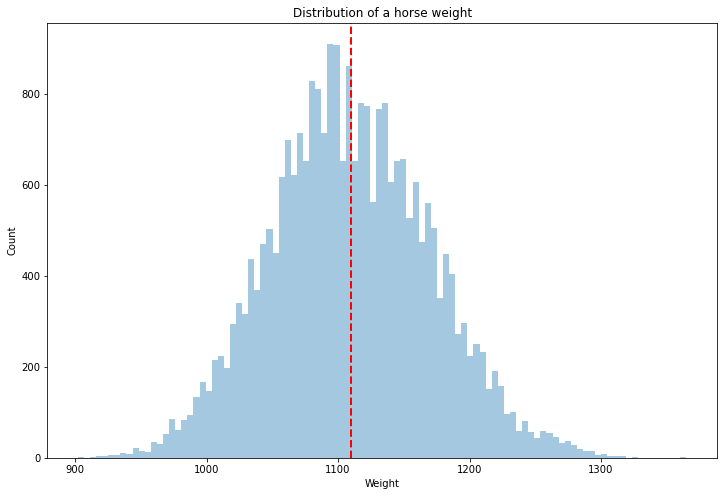

time: 250 ms (started: 2022-10-22 00:11:35 +08:00)


In [7]:
# Draw the mean of a horse weight on same plot
plt.figure(figsize=(12, 8))
sns.distplot(df_train['declared_horse_weight'], bins=100, kde=False)
plt.title("Distribution of a horse weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.axvline(df_train['declared_horse_weight'].mean(), color='r', linestyle='dashed', linewidth=2)

plt.show()


In [8]:
# Find the number of horses each race
numHorsePerRace = df_train.groupby('race_id')['horse_id'].count().value_counts()

time: 0 ns (started: 2022-10-22 00:11:35 +08:00)


Text(0.5, 1.0, 'Distribution of Number of Horses per Race')

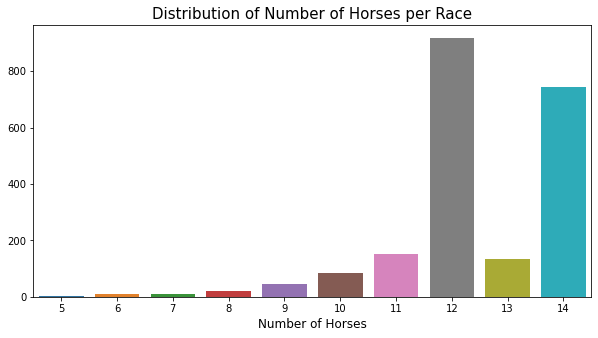

time: 125 ms (started: 2022-10-22 00:11:35 +08:00)


In [9]:
# Plot the distribution of the number of horses
plt.figure(figsize=(10, 5))
sns.barplot(x=numHorsePerRace.index, y=numHorsePerRace.values)
plt.xlabel('Number of Horses', fontsize=12)
plt.ylabel

# Set title
plt.title('Distribution of Number of Horses per Race', fontsize=15)


Text(0.5, 1.0, 'Distribution of Actual Weight')

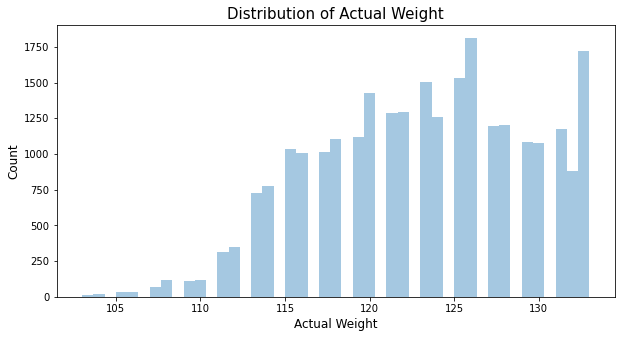

time: 172 ms (started: 2022-10-22 00:11:35 +08:00)


In [10]:
# Plot the distribution of actual weight
plt.figure(figsize=(10, 5))
sns.distplot(df_train['actual_weight'], kde=False)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Actual Weight', fontsize=15)


Text(0.5, 1.0, 'Recent Average Rank vs Win Odds')

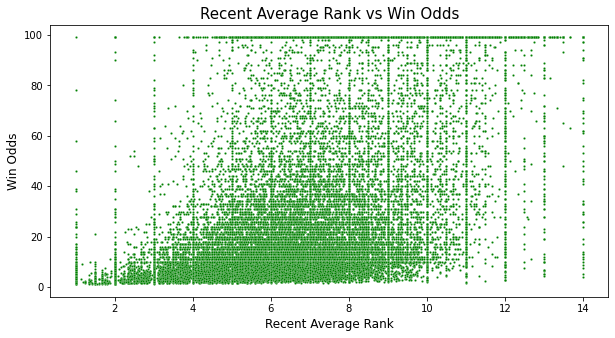

time: 141 ms (started: 2022-10-22 00:11:35 +08:00)


In [11]:
# plot recent average rank against win_odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='recent_ave_rank', y='win_odds', data=df_train, s=5, color='g')
plt.xlabel('Recent Average Rank', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Recent Average Rank vs Win Odds', fontsize=15)


Text(0.5, 1.0, 'Mean Win Odds against Finishing Position')

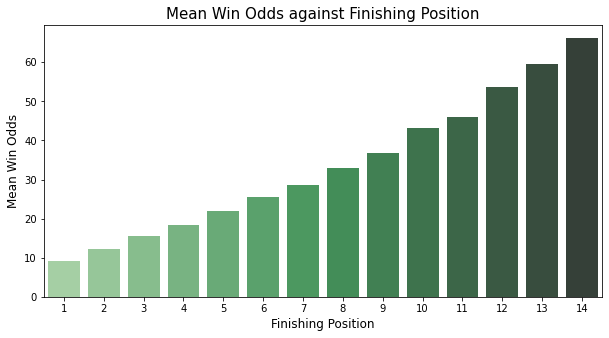

time: 156 ms (started: 2022-10-22 00:11:36 +08:00)


In [12]:
# Plot mean of win odds against finishings
plt.figure(figsize=(10, 5))
sns.barplot(x=df_train['finishing_position'].unique(), y=df_train.groupby('finishing_position')['win_odds'].mean(), palette='Greens_d')
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Win Odds', fontsize=12)
plt.title('Mean Win Odds against Finishing Position', fontsize=15)

Text(0.5, 1.0, 'Distribution of Actual Weight against Win Odds')

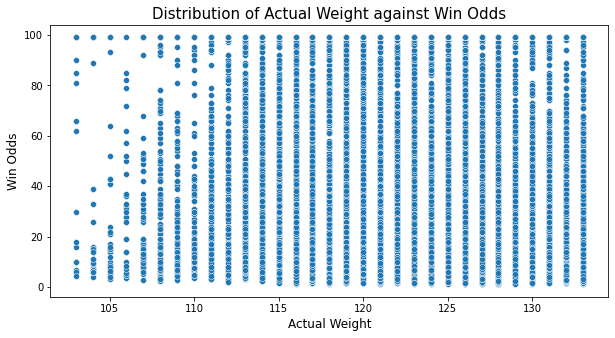

time: 156 ms (started: 2022-10-22 00:11:36 +08:00)


In [13]:
# Plot distribution of actual weight against win odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='win_odds', data=df_train)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Distribution of Actual Weight against Win Odds', fontsize=15)


Text(0.5, 1.0, 'Distribution of Actual Weight against Horse Number')

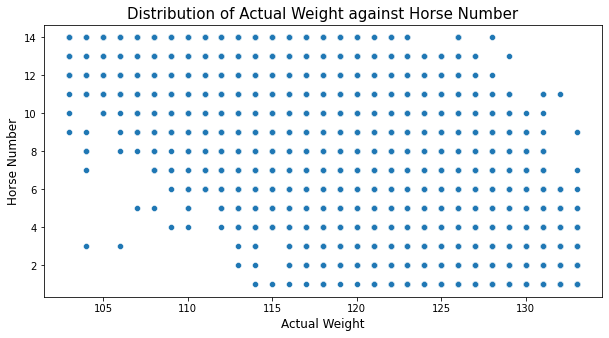

time: 172 ms (started: 2022-10-22 00:11:36 +08:00)


In [14]:
# Plot distribution of actual weight against horse number
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='horse_number', data=df_train)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Horse Number', fontsize=12)
plt.title('Distribution of Actual Weight against Horse Number', fontsize=15)


Hong Kong horse racing uses the handicap system. Horse number #1 has the highest rating and carry the heaviest weight.

Text(0.5, 1.0, 'Distribution of Mean Actual Weight for Each Horse Number')

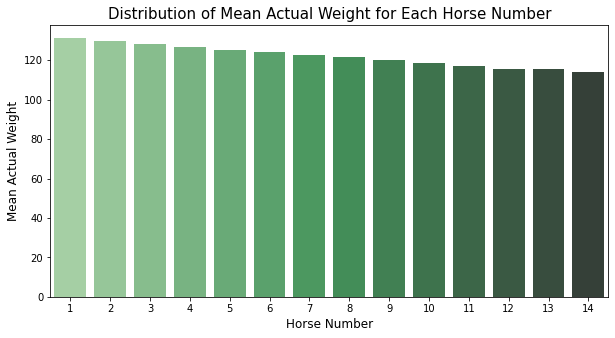

time: 219 ms (started: 2022-10-22 00:11:36 +08:00)


In [15]:
# Find the mean of actual weight for each horse number
meanWtPerHorse = df_train.groupby('horse_number')['actual_weight'].mean()

# Plot the distribution of mean actual weight for each horse number
plt.figure(figsize=(10, 5))
sns.barplot(x=meanWtPerHorse.index.astype(int), y=meanWtPerHorse.values, palette='Greens_d')
plt.xlabel('Horse Number', fontsize=12)
plt.ylabel('Mean Actual Weight', fontsize=12)
plt.title('Distribution of Mean Actual Weight for Each Horse Number', fontsize=15)


Text(0.5, 1.0, 'Distribution of Finishing Position against Draw')

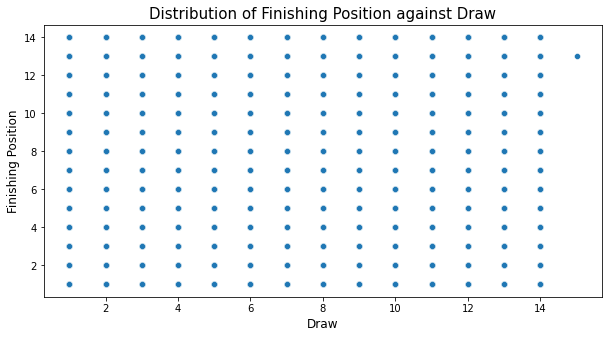

time: 156 ms (started: 2022-10-22 00:11:36 +08:00)


In [16]:
# Plot the distribution of finishing position against draw
plt.figure(figsize=(10, 5))
sns.scatterplot(x='draw', y='finishing_position', data=df_train)
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.title('Distribution of Finishing Position against Draw', fontsize=15)


The gate number for each horse is drawn 2 days before the races. Gate number 1 is the closest to the inside rail. Thus, we would expect better performance for horses with lower draw number.

Text(0.5, 1.0, 'Distribution of Average Finishing Position against Draw')

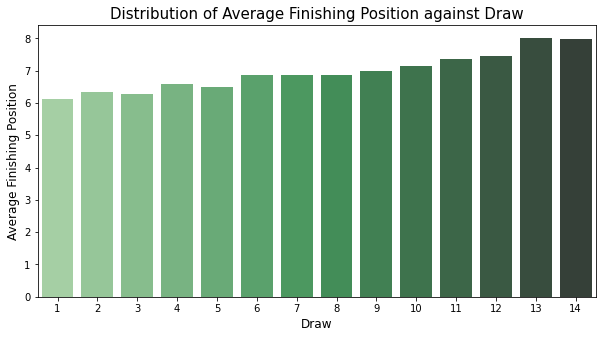

time: 140 ms (started: 2022-10-22 00:11:37 +08:00)


In [17]:
# Return only 14 columns. Draw #15 is not included.
avgPos_vs_Draw = df_train.groupby('draw')['finishing_position'].mean()[:14]

# Plot the distribution of average finishing position against draw
plt.figure(figsize=(10, 5))
sns.barplot(x=avgPos_vs_Draw.index, y=avgPos_vs_Draw.values, palette='Greens_d')
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.title('Distribution of Average Finishing Position against Draw', fontsize=15)


(1070.0, 1120.0)

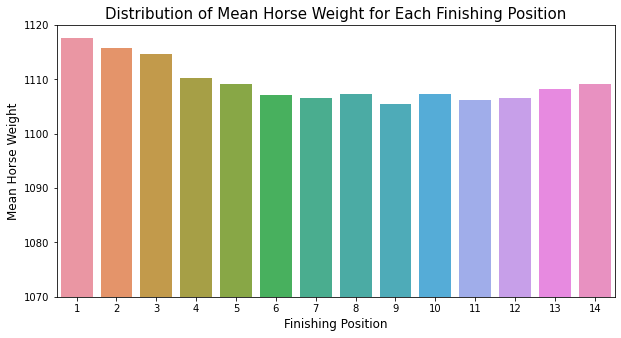

time: 140 ms (started: 2022-10-22 00:11:37 +08:00)


In [18]:
# Find the mean of horse weight for each position
meanHorseWtPerPos = df_train.groupby('finishing_position')['declared_horse_weight'].mean()

# Plot the distribution of mean horse weight for each position
plt.figure(figsize=(10, 5))
sns.barplot(x=meanHorseWtPerPos.index, y=meanHorseWtPerPos.values)
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Horse Weight', fontsize=12)
plt.title('Distribution of Mean Horse Weight for Each Finishing Position', fontsize=15)

# Set y limit
plt.ylim(1070, 1120)


Not conclusive to say that there is a relationship between horse weight and finishing position.

In [19]:
# view df_train
df_train.head()


,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,NaN,2014-001,1,1.0,1400,1,1,1,6.058185,7.369681
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,NaN,2014-001,2,2.0,1400,0,1,1,5.795734,6.721234
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,NaN,2014-001,3,3.0,1400,0,1,1,7.857759,6.850174
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,NaN,2014-001,4,4.0,1400,0,0,1,4.173402,6.631579
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,NaN,2014-001,5,5.0,1400,0,0,1,5.343498,6.846633


time: 16 ms (started: 2022-10-22 00:11:37 +08:00)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'finishing_position'),
  Text(1.5, 0, 'actual_weight'),
  Text(2.5, 0, 'declared_horse_weight'),
  Text(3.5, 0, 'draw'),
  Text(4.5, 0, 'recent_ave_rank'),
  Text(5.5, 0, 'jockey_ave_rank'),
  Text(6.5, 0, 'trainer_ave_rank'),
  Text(7.5, 0, 'race_distance')])

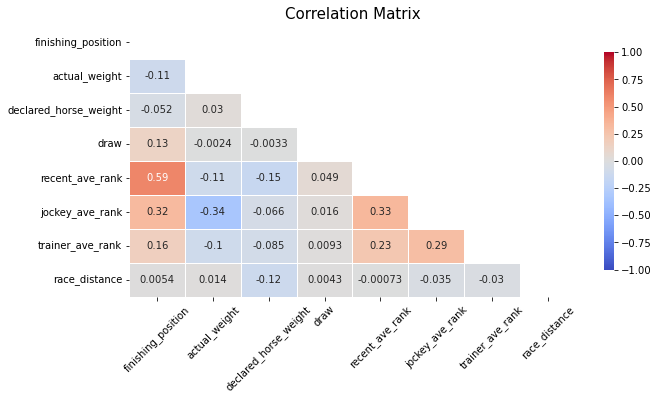

time: 250 ms (started: 2022-10-22 00:11:37 +08:00)


In [20]:
# keep only features we want
cols = ['finishing_position', 'actual_weight', 'declared_horse_weight', 'draw', 'recent_ave_rank', 
        'jockey_ave_rank','trainer_ave_rank', 'race_distance']

# view the correlation matrix
corr = df_train[cols].corr()

# do a mask to hide the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 5))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, 
            center=0, square=False, linewidths=.5, 
            cbar_kws={"shrink": .8}, annot=True)
plt.title('Correlation Matrix', fontsize=15)

# rotate the ticklabels for easier reading
plt.xticks(rotation=45)



## Find the best jockey

In [21]:
# Find out how many jockeys are there
print("There are {} jockeys in the dataset.".format(len(df_train['jockey'].unique())))

There are 103 jockeys in the dataset.
time: 0 ns (started: 2022-10-22 00:11:37 +08:00)


In [22]:
# Finding the number of wins per jockey
jockeyWins = df_train.groupby('jockey')['finishing_position'].apply(lambda x: (x==1).sum())

# Finding the win rate per jockey
jockeyWinRate = df_train.groupby('jockey')['HorseWin'].mean()

time: 16 ms (started: 2022-10-22 00:11:37 +08:00)


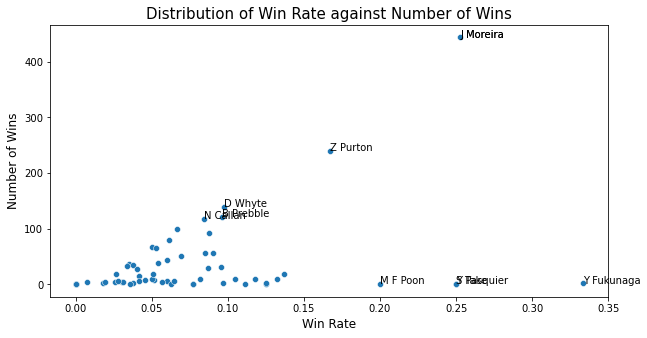

time: 125 ms (started: 2022-10-22 00:11:37 +08:00)


In [23]:
# Plot win rate against number of wins
plt.figure(figsize=(10, 5))
sns.scatterplot(x=jockeyWinRate, y=jockeyWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 jockeys with the most wins
for i in jockeyWins.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (jockeyWinRate[i], jockeyWins[i]))

# Annotation for the top 5 jockeys with the highest win rate
for i in jockeyWinRate.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (jockeyWinRate[i], jockeyWins[i]))
    



Text(0.5, 1.0, 'Distribution of Jockey Frequency')

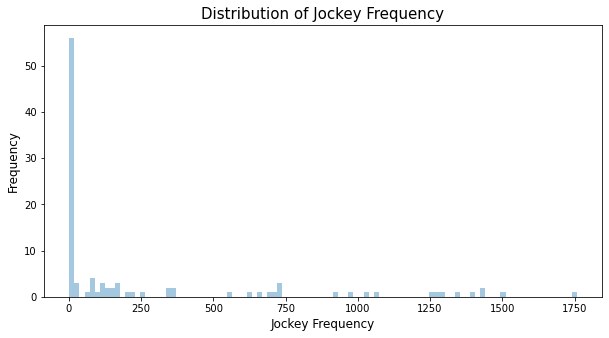

time: 187 ms (started: 2022-10-22 00:11:37 +08:00)


In [24]:
# Find the frequency of each jockey
jockeyFreq = df_train['jockey'].value_counts()

# Plot histogram of jockey frequency
plt.figure(figsize=(10, 5))
sns.distplot(jockeyFreq, kde=False, bins=100)
plt.xlabel('Jockey Frequency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Jockey Frequency', fontsize=15)

## Find the best trainer

In [25]:
# Find out how many trainers are there
print('Number of trainers: ', len(df_train['trainer'].unique()))

Number of trainers:  90
time: 0 ns (started: 2022-10-22 00:11:38 +08:00)


In [26]:
# Find the number of wins per trainer
trainerWins = df_train.groupby('trainer')['finishing_position'].apply(lambda x: (x==1).sum())

# Find the win rate per trainer
trainerWinRate = df_train.groupby('trainer')['HorseWin'].mean()

time: 15 ms (started: 2022-10-22 00:11:38 +08:00)


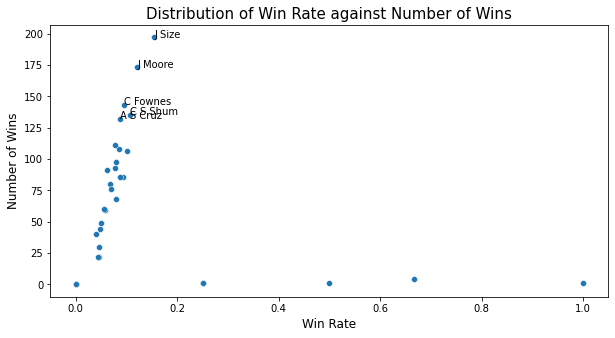

time: 141 ms (started: 2022-10-22 00:11:38 +08:00)


In [27]:
# Plot win rate against number of wins
plt.figure(figsize=(10, 5))
sns.scatterplot(x=trainerWinRate, y=trainerWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 trainers with the most wins
for i in trainerWins.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (trainerWinRate[i], trainerWins[i]))

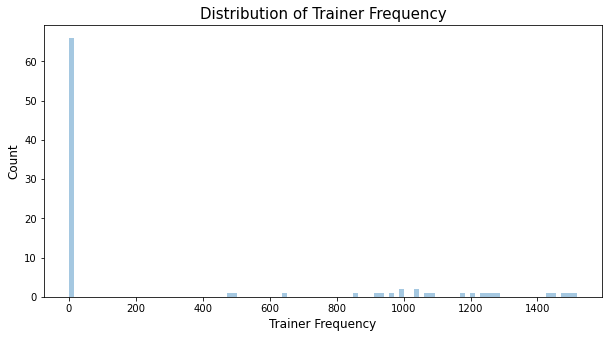

time: 203 ms (started: 2022-10-22 00:11:38 +08:00)


In [28]:
# Find the frequency of each trainer
trainerFreq = df_train['trainer'].value_counts()

# Plot the distribution of trainer frequency
plt.figure(figsize=(10, 5))
sns.distplot(trainerFreq, kde=False, bins=100)
plt.xlabel('Trainer Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Trainer Frequency', fontsize=15);

In [29]:
# Trainer data also heavy skewed
trainerFreq

A S Cruz      1517
C Fownes      1498
C H Yip       1486
Y S Tsui      1447
J Moore       1429
              ... 
D O'Meara        1
E Mader          1
K Lees           1
R Varian         1
S H Cheong       1
Name: trainer, Length: 90, dtype: int64

time: 0 ns (started: 2022-10-22 00:11:38 +08:00)


## Find the best horse

In [30]:
# Find out how many horses are there
print('Number of horses: ', len(df_train['horse_id'].unique()))

Number of horses:  2037
time: 0 ns (started: 2022-10-22 00:11:38 +08:00)


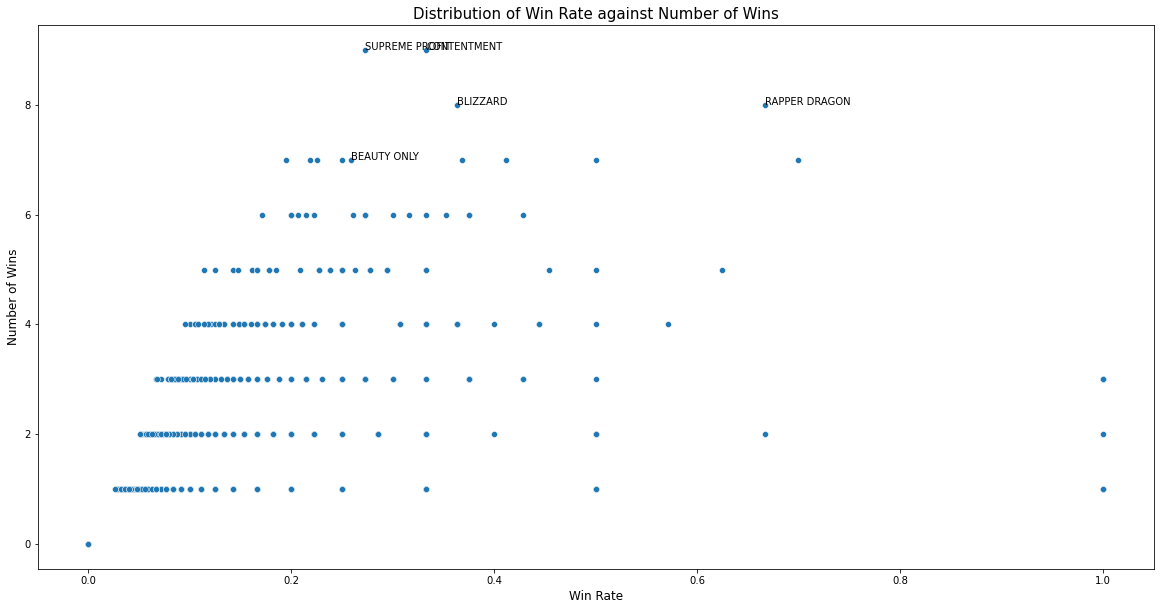

time: 391 ms (started: 2022-10-22 00:11:38 +08:00)


In [31]:
# Find the number of wins per horse
horseWins = df_train.groupby('horse_name')['finishing_position'].apply(lambda x: (x==1).sum())

# Find the win rate per horse
horseWinRate = df_train.groupby('horse_name')['HorseWin'].mean()

# Plot win rate against number of wins
plt.figure(figsize=(20, 10))
sns.scatterplot(x=horseWinRate, y=horseWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 horses with the most wins
for i in horseWins.sort_values(ascending=False)[:5].index:
     plt.annotate(i, (horseWinRate[i], horseWins[i]))

In [32]:
horseWins.sort_values(ascending=False)[:5]

horse_name
SUPREME PROFIT    9
CONTENTMENT       9
BLIZZARD          8
RAPPER DRAGON     8
BEAUTY ONLY       7
Name: finishing_position, dtype: int64

time: 16 ms (started: 2022-10-22 00:11:39 +08:00)


In [33]:
horseWinRate.sort_values(ascending=False)[:20]

horse_name
SAM'S LOVE           1.000000
BAYONET              1.000000
CHAUTAUQUA           1.000000
SIGHT LEADER         1.000000
BRAVO WATCHMAN       1.000000
NOTHINGILIKEMORE     1.000000
MAGIC LEGEND         1.000000
MAURICE              1.000000
MR STUNNING          0.700000
RAPPER DRAGON        0.666667
STAR TRACK           0.666667
D B PIN              0.625000
ROMANTIC CASH        0.571429
CALL ME HANDSOME     0.500000
ABLE FRIEND          0.500000
WHAT ELSE BUT YOU    0.500000
YEE CHEONG STAR      0.500000
LUCKY WAN FENG       0.500000
THEWIZARDOFOZ        0.500000
BOOMING DELIGHT      0.500000
Name: HorseWin, dtype: float64

time: 0 ns (started: 2022-10-22 00:11:39 +08:00)


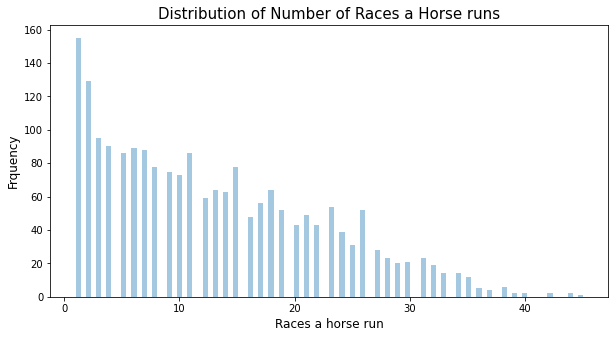

time: 281 ms (started: 2022-10-22 00:11:39 +08:00)


In [34]:
# Find the frequency of each horse
horseFreq = df_train['horse_id'].value_counts()

# Plot the distribution of horse frequency
plt.figure(figsize=(10, 5))
sns.distplot(horseFreq, kde=False, bins=100)
plt.xlabel('Races a horse run', fontsize=12)
plt.ylabel('Frquency', fontsize=12)
plt.title('Distribution of Number of Races a Horse runs', fontsize=15);


Text(0.5, 1.0, 'Distribution of Recent Average Rank of Horse against Finishing Position')

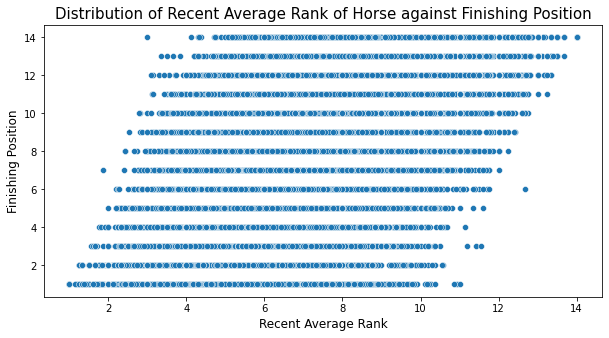

time: 157 ms (started: 2022-10-22 00:11:39 +08:00)


In [35]:
# Plot the recent average rank of each horse against finishing position
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_train['recent_ave_rank'], y=df_train['finishing_position'])
plt.xlabel('Recent Average Rank', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.title('Distribution of Recent Average Rank of Horse against Finishing Position', fontsize=15)
